# Mini Project (Tesla Stock Data Visualization)


### Importing the libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
tesla_df = pd.read_csv("./tesla_stock_data.csv")
tesla_df.head(10)

,Date,Year,Open,High,Low,Close,Volume,Adj Close
0,2020-01-02,2020,28.299999,28.713333,28.114000,28.684000,142981500,28.684000
1,2020-01-03,2020,29.366667,30.266666,29.128000,29.534000,266677500,29.534000
2,2020-01-06,2020,29.364668,30.104000,29.333332,30.102667,151995000,30.102667
3,2020-01-07,2020,30.760000,31.441999,30.224001,31.270666,268231500,31.270666
4,2020-01-08,2020,31.580000,33.232666,31.215334,32.809334,467164500,32.809334
5,2020-01-09,2020,33.139999,33.253334,31.524668,32.089333,426606000,32.089333
6,2020-01-10,2020,32.119331,32.329334,31.580000,31.876667,194392500,31.876667
7,2020-01-13,2020,32.900002,35.042000,32.799999,34.990665,397764000,34.990665
8,2020-01-14,2020,36.284000,36.493999,34.993332,35.861332,434943000,35.861332
9,2020-01-15,2020,35.317333,35.855999,34.452667,34.566666,260532000,34.566666


### Understanding the Dataset Structure

**About this Dataset:**
> This Dataset consists of 8 Columns and 996 Rows.
- 1 column is of object datatype such as Date.
- 2 Columns are of int datatype such as Year, Volume.
- 5 Columns are of float datatype such as Open, High, Low, Close, Adj Close.
- There are no missing values in this dataset.
- There are no duplicate rows in this dataset.

In [4]:
tesla_df.info()
tesla_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       996 non-null    object 
 1   Year       996 non-null    int64  
 2   Open       996 non-null    float64
 3   High       996 non-null    float64
 4   Low        996 non-null    float64
 5   Close      996 non-null    float64
 6   Volume     996 non-null    int64  
 7   Adj Close  996 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 62.4+ KB


(996, 8)

In [5]:
tesla_df.isnull().sum()

Date         0
Year         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
tesla_df.duplicated().value_counts()

False    996
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Summary Statistics

> Applied a modern seaborn style

**1. Year Distribution**
- The data spans from 2020 to 2023, with nearly equal distribution across these years.
- There are 996 records in total, with 250 entries for each year.
- This suggests the dataset includes daily or regular intervals over these years.
  
**2. Open Prices**

- The histogram shows a right-skewed distribution, with most prices between 150 and 250 units.
- The mean open price is 209.20, and the majority of values fall between 159.78 (25th percentile) and 263.09 (75th percentile).
- There are some outliers, with values reaching as high as 411.47 units.
  
**3. High Prices**

- The high prices are more evenly distributed but still exhibit some right skewness.
- Most high prices lie between 162.62 and 268.01, with a mean of 213.96.
- The highest recorded value is 414.50 units, indicating a few extreme peaks.
  
**4. Low Prices**
- The distribution of low prices mirrors the open and high prices, but with a slightly tighter spread.
- The mean low price is 204.06, and the range covers values from 154.39 (25th percentile) to 258.12 (75th percentile).
- There are fewer low outliers, with a maximum low of 405.67.

**5. Close Prices**

- Close prices are very similar to open prices, showing a similar pattern of right skewness.
- The mean close price is 209.12, with most values between 160.25 (25th percentile) and 262.67 (75th percentile).
- The maximum close price reaches 409.97, similar to the highs and lows.
  
**6.Volume**

- Volume shows a highly skewed distribution with most values concentrated at the lower end.
- The majority of trading volumes are less than 2 × 10^8, with extreme volumes up to 9.14 × 10^8, indicating a few days of unusually high trading activity.
  
**7. Adjusted Close Prices**
- Adjusted close prices follow the same distribution as the close prices, with similar mean (209.12) and range (24.08 to 409.97).
- The distribution suggests minimal adjustment differences between close and adjusted close prices, which is typical for dividends or stock splits.

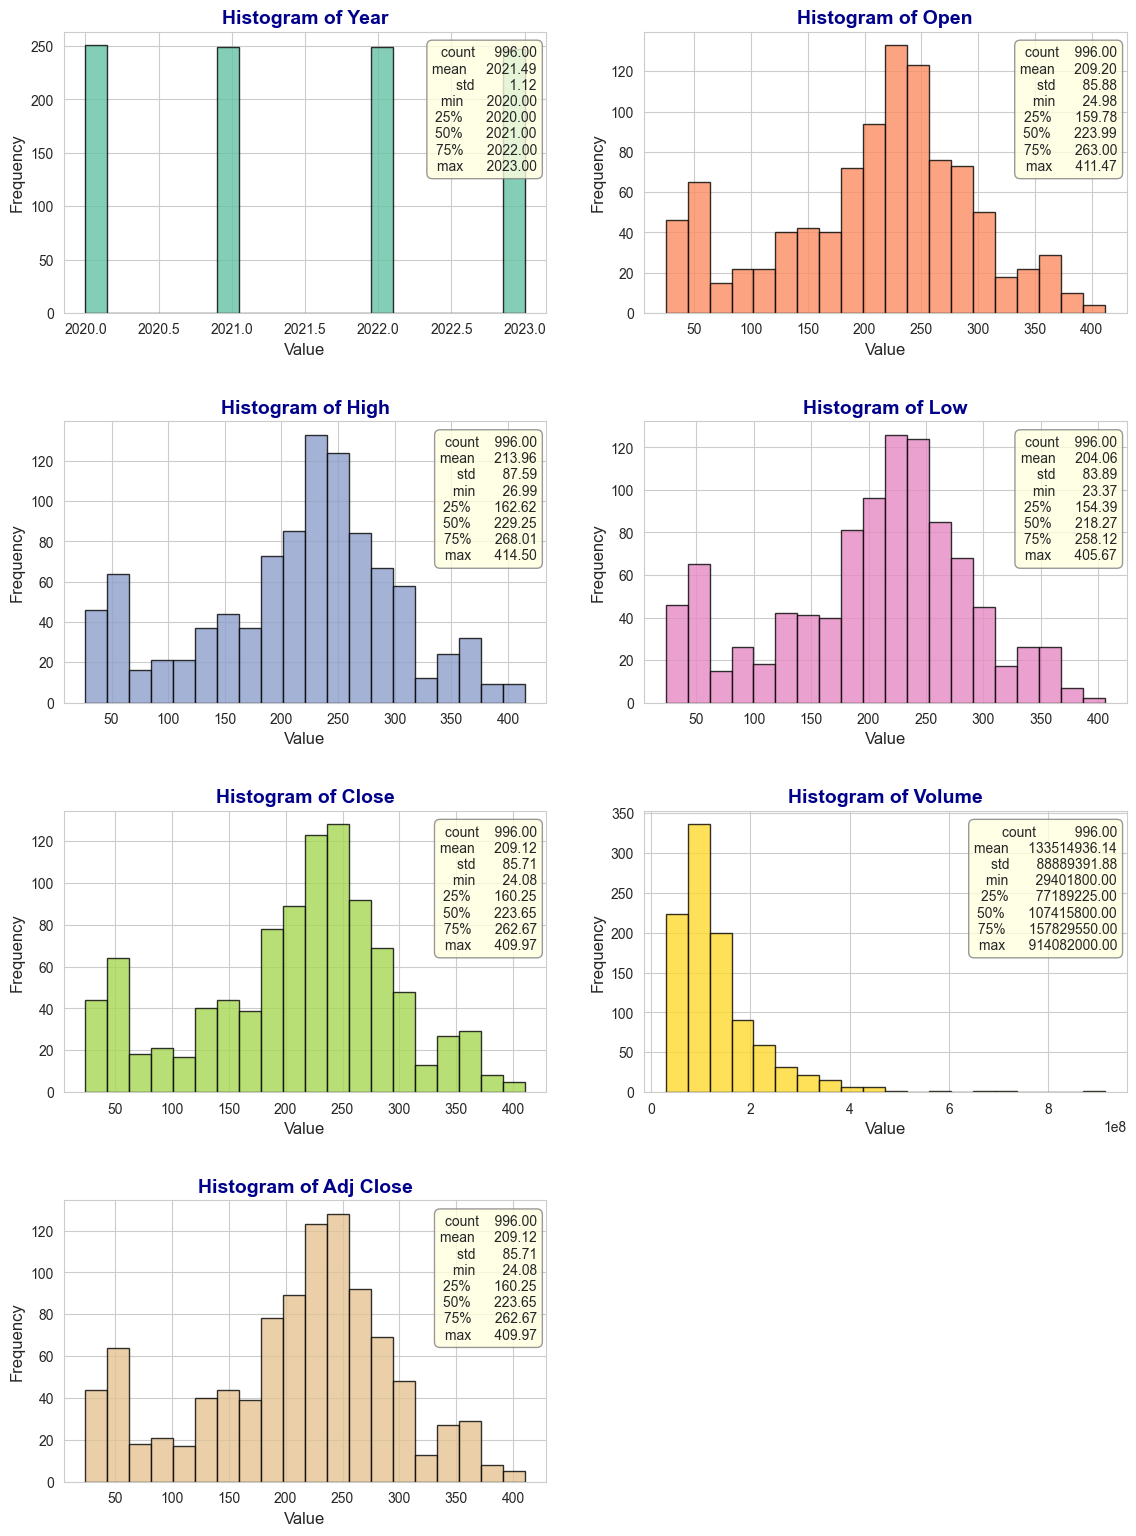

In [7]:
sns.set_style("whitegrid")

# Drop 'Date' column for visualization
columns = tesla_df.drop("Date", axis=1).columns

n_cols = 2
n_rows = int(np.ceil(len(columns) / n_cols))

# Create subplots with larger figure size for readability
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

# Defining color palette for the histograms
colors = sns.color_palette("Set2", len(columns))

# Plot histograms and display summary statistics
for i, column in enumerate(columns):
    ax = axes[i]
    col_data = tesla_df[column]

    # Use a more visually appealing color for histograms
    ax.hist(
        col_data, bins=20, edgecolor="black", color=colors[i % len(colors)], alpha=0.8
    )

    # Set titles and labels with better formatting
    ax.set_title(f"Histogram of {column}", fontsize=14, weight="bold", color="darkblue")
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

    # Add summary statistics with improved formatting and placement
    summary_text = tesla_df[column].describe().apply(lambda x: f"{x:.2f}").to_string()
    ax.text(
        0.98,
        0.95,
        summary_text,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(
            boxstyle="round,pad=0.4",
            facecolor="lightyellow",
            edgecolor="gray",
            alpha=0.8,
        ),
    )

# Remove unused subplots
for ax in axes[len(columns) :]:
    fig.delaxes(ax)

# Add some space between subplots
plt.tight_layout(pad=3.0)
plt.show()

### Checking for Outliers


In [ ]:
# Drop 'Date' column for plotting purposes
tesla_df_temp = tesla_df.drop("Date", axis=1)

# Create a figure to plot multiple box plots
plt.figure(figsize=(10, 6))

# Create the box plot using seaborn
sns.boxplot(data=tesla_df_temp, palette="Set3", linewidth=2)

# Customize the plot
plt.title("Box Plot of Tesla Stock Data", fontsize=16)
plt.xlabel("Stock Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

# Show the plot
plt.show()

##### Detect Outliers using IQR Method


In [89]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
tesla_df_copy = tesla_df.copy()

tesla_df_copy["Date"] = pd.to_datetime(tesla_df_copy["Date"])

# Detect outliers in 'Close' column
outliers = detect_outliers_iqr(tesla_df_copy, "Volume")

# Plot data and outliers
plt.figure(figsize=(12, 6))
plt.scatter(tesla_df_copy["Date"], tesla_df_copy["Volume"], label="Data", color="blue")
plt.scatter(
    outliers["Date"],
    outliers["Volume"],
    label="Outliers",
    color="red",
    marker="X",
    s=100,
)

# Customize plot
plt.title("Tesla Closing Prices with Outliers Highlighted", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Detect and display outliers for each column
for column in tesla_df_copy:
    outliers = detect_outliers_iqr(tesla_df_copy, column)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers found in {column}.")

### Time Frame of the Dataset

In [ ]:
# Lets convert the Date column to datetime format
# tesla_df_copy["Date"] = pd.to_datetime(tesla_df_copy["Date"])
# Lets find the starting and ending date of the dataset
starting_date = tesla_df_copy["Date"].min()
ending_date = tesla_df_copy["Date"].max()
# Lets check the Format of dates
starting_date_formatted = starting_date.strftime("%Y-%m-%d")
ending_date_formatted = ending_date.strftime("%Y-%m-%d")
# print the starting and ending date
print("Starting date is:", starting_date_formatted)
print("Ending date is:", ending_date_formatted)

print(
    f"Total days in this dataset which represents the stock price are: {(tesla_df_copy.Date.max()-tesla_df_copy.Date.min()).days}days"
)

In [ ]:
tesla_df_copy2 = tesla_df_copy.copy()

# Set 'Date' as the index
tesla_df_copy2.set_index("Date", inplace=True)

# Resample to daily frequency and count records
df_resampled = tesla_df_copy2.resample("D").size()

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the number of records per day
plt.bar(df_resampled.index, df_resampled, color="blue", edgecolor="black")

# Highlight the time frame
start_date = tesla_df_copy2.index.min()
end_date = tesla_df_copy2.index.max()
plt.axvline(
    x=start_date,
    color="green",
    linestyle="--",
    label=f"Start Date: {start_date.date()}",
)
plt.axvline(
    x=end_date, color="red", linestyle="--", label=f"End Date: {end_date.date()}"
)

# Customize the plot
plt.title("Time Frame of Tesla Stock Data Availability", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

### Interactive Line Plot for Opening Prices

In [ ]:
# Create interactive line plot
fig = go.Figure()

# Add trace for closing prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Open"],
        mode="lines+markers",
        name="Opening Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Tesla Opening Prices Over Time",
    xaxis_title="Date",
    yaxis_title="Opening Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Interactive Line Plot for Closing Prices

In [ ]:
# Create interactive line plot
fig = go.Figure()

# Add trace for closing prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Close"],
        mode="lines+markers",
        name="Closing Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Tesla Closing Prices Over Time",
    xaxis_title="Date",
    yaxis_title="Closing Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

###  Interactive OHLC (Open, High, Low, Close) chart

In [ ]:
# Create OHLC chart
fig = go.Figure()

# Add OHLC trace
fig.add_trace(
    go.Ohlc(
        x=tesla_df_copy["Date"],
        open=tesla_df_copy["Open"],
        high=tesla_df_copy["High"],
        low=tesla_df_copy["Low"],
        close=tesla_df_copy["Close"],
        name="OHLC",
    )
)

# Customize layout
fig.update_layout(
    title="Tesla OHLC Chart",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Yearly Opening and Closing Prices of Tesla Stock

In [ ]:
tesla_df_copy3 = tesla_df_copy.copy()

# Extract year and group by year
tesla_df_copy3["Year"] = tesla_df_copy3["Date"].dt.year
yearly_data = (
    tesla_df_copy3.groupby("Year").agg({"Open": "first", "Close": "last"}).reset_index()
)

# Create interactive bar plot
fig = go.Figure()

# Add bars for Opening Prices
fig.add_trace(
    go.Bar(
        x=yearly_data["Year"],
        y=yearly_data["Open"],
        name="Opening Price",
        marker_color="blue",
    )
)

# Add bars for Closing Prices
fig.add_trace(
    go.Bar(
        x=yearly_data["Year"],
        y=yearly_data["Close"],
        name="Closing Price",
        marker_color="red",
    )
)

# Customize layout
fig.update_layout(
    title="Yearly Opening and Closing Prices of Tesla Stock",
    xaxis_title="Year",
    yaxis_title="Price",
    barmode="group",
    template="plotly_white",
    hovermode="x unified",
)

# Show interactive plot
fig.show()

#### Monthly Opening and Closing Prices of Tesla Stock

In [ ]:
tesla_df_copy4 = tesla_df_copy.copy()

# Extract month and year for grouping
tesla_df_copy4["YearMonth"] = tesla_df_copy4["Date"].dt.to_period("M")

# Group by year and month, then aggregate opening and closing prices
monthly_data = (
    tesla_df_copy4.groupby("YearMonth")
    .agg({"Open": "first", "Close": "last"})
    .reset_index()
)

# Create interactive line plot
fig = go.Figure()

# Add line trace for Opening Prices
fig.add_trace(
    go.Scatter(
        x=monthly_data["YearMonth"].astype(str),
        y=monthly_data["Open"],
        mode="lines+markers",
        name="Opening Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Add line trace for Closing Prices
fig.add_trace(
    go.Scatter(
        x=monthly_data["YearMonth"].astype(str),
        y=monthly_data["Close"],
        mode="lines+markers",
        name="Closing Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="Monthly Opening and Closing Prices of Tesla Stock",
    xaxis_title="Month",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Line Chart for high and low prices across the date range

In [ ]:
# Create interactive line plot
fig = go.Figure()

# Add line trace for High Prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["High"],
        mode="lines+markers",
        name="High Price",
        marker=dict(color="green"),
        line=dict(width=2),
    )
)

# Add line trace for Low Prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy["Date"],
        y=tesla_df_copy["Low"],
        mode="lines+markers",
        name="Low Price",
        marker=dict(color="red"),
        line=dict(width=2),
    )
)

# Customize layout
fig.update_layout(
    title="High and Low Prices of Tesla Stock Over Time",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Lagged Variables

In [ ]:
tesla_df_copy5 = tesla_df_copy.copy()

# Create lagged variables
lag = 1  # Specify the lag you want to create
tesla_df_copy5[f"Close_Lag_{lag}"] = tesla_df_copy5["Close"].shift(lag)

# Drop rows with NaN values (caused by shifting)
tesla_df_copy5 = tesla_df_copy5.dropna()

# Create interactive line plot to visualize lagged variables
fig = go.Figure()

# Plot for original Close prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy5["Date"],
        y=tesla_df_copy5["Close"],
        mode="lines+markers",
        name="Close Price",
        marker=dict(color="blue"),
        line=dict(width=2),
    )
)

# Plot for lagged Close prices
fig.add_trace(
    go.Scatter(
        x=tesla_df_copy5["Date"],
        y=tesla_df_copy5[f"Close_Lag_{lag}"],
        mode="lines+markers",
        name=f"Close Price Lag {lag}",
        marker=dict(color="red"),
        line=dict(width=2, dash="dash"),
    )
)

# Customize layout
fig.update_layout(
    title=f"Close Prices and Lagged Close Prices (Lag = {lag})",
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Using Seaborn for Static Heatmap

In [ ]:
# Calculate the correlation matrix
corr_matrix = tesla_df_temp.corr()

# Create static heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap="viridis", center=0, vmin=-1, vmax=1, fmt=".2f"
)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Scatter Plot with Regression Line for Volume and Close

In [ ]:
# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x="Volume",
    y="Close",
    data=tesla_df_copy,
    scatter_kws={"color": "blue"},  # Color for scatter points
    line_kws={"color": "red"},  # Color for regression line
)
plt.title("Scatter Plot with Regression Line for Volume and Close Prices")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Interactive Candlestick Chart

In [ ]:
# Create interactive candlestick chart
fig = go.Figure(
    data=[
        go.Candlestick(
            x=tesla_df_copy["Date"],
            open=tesla_df_copy["Open"],
            high=tesla_df_copy["High"],
            low=tesla_df_copy["Low"],
            close=tesla_df_copy["Close"],
            name="Candlestick",
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Candlestick Chart of Tesla’s Stock",
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False,  # Optional: Hide range slider
    template="plotly_white",
)

# Show interactive plot
fig.show()

### Interactive Area Chart of Tesla’s Trading Volume

In [ ]:
# Create interactive area chart
fig = go.Figure(
    data=[
        go.Scatter(
            x=tesla_df_copy["Date"],
            y=tesla_df_copy["Volume"],
            mode="lines",
            fill="tozeroy",  # Fill the area under the line
            name="Trading Volume",
            line=dict(color="royalblue"),
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Area Chart of Tesla’s Trading Volume",
    xaxis_title="Date",
    yaxis_title="Volume",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    yaxis=dict(title="Volume", tickformat=",.0f"),  # Format y-axis with commas
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Interactive Bar Chart of Tesla’s Daily Price Changes

In [ ]:
tesla_df_copy6 = tesla_df_copy.copy()

# Calculate daily price change
tesla_df_copy6["Price Change"] = (
    tesla_df_copy6["Close"].diff().fillna(0)
)  # Use 0 for the first entry

# Create interactive bar chart
fig = go.Figure(
    data=[
        go.Bar(
            x=tesla_df_copy6["Date"],
            y=tesla_df_copy6["Price Change"],
            marker=dict(
                color=tesla_df_copy6["Price Change"],
                colorscale="Viridis",
                colorbar=dict(title="Price Change"),
            ),
            text=tesla_df_copy6["Price Change"].apply(
                lambda x: f"{x:.2f}"
            ),  # Display price change values
            textposition="auto",
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Bar Chart of Tesla’s Daily Price Changes",
    xaxis_title="Date",
    yaxis_title="Price Change",
    template="plotly_white",
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode="x unified",
)

# Show interactive plot
fig.show()

### Interactive Box Plot of Tesla’s Stock Volume

In [ ]:
# Create an interactive box plot of Tesla's stock volume
fig = go.Figure()


fig.add_trace(go.Box(y=tesla_df_copy["Volume"], name="Volume"))
fig.update_layout(title="Box Plot of Tesla Stock Volume", yaxis_title="Volume")
fig.show()

In [ ]:
# Create interactive box plot
fig = go.Figure(
    data=[
        go.Box(
            y=tesla_df_copy["Volume"],
            boxmean="sd",  # Show mean with standard deviation
            name="Trading Volume",
            marker=dict(
                color="lightblue",
                outliercolor="rgba(219, 64, 82, 0.6)",  # Customize outlier color
                size=10,  # Adjust marker size
            ),
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Box Plot of Tesla’s Stock Volume",
    yaxis_title="Volume",
    template="plotly_white",
    xaxis=dict(title="Trading Volume"),
)

# Show interactive plot
fig.show()

### Interactive Histogram of Tesla’s Daily Returns

In [ ]:
# Calculate daily returns
tesla_df_copy["Return"] = (
    tesla_df_copy["Close"].pct_change().fillna(0)
)  # Percentage change, fill NaN with 0

# Create interactive histogram
fig = go.Figure(
    data=[
        go.Histogram(
            x=tesla_df_copy["Return"],
            nbinsx=30,  # Number of bins
            marker=dict(color="blue"),
            opacity=0.7,
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive Histogram of Tesla’s Daily Returns",
    xaxis_title="Daily Return",
    yaxis_title="Frequency",
    template="plotly_white",
    xaxis=dict(tickformat=".2%", title="Daily Return (%)"),
    yaxis=dict(title="Frequency"),
    hovermode="closest",
)

# Show interactive plot
fig.show()

###  Interactive 3D Scatter Plot of Tesla’s High, Low, and Closing Prices

In [ ]:
# Create interactive 3D scatter plot
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=tesla_df_copy["High"],
            y=tesla_df_copy["Low"],
            z=tesla_df_copy["Close"],
            mode="markers",
            marker=dict(
                size=8,
                color=tesla_df_copy["Close"],  # Color by closing price
                colorscale="Viridis",  # Color scale
                colorbar=dict(title="Close Price"),
            ),
            text=tesla_df_copy["Date"].dt.strftime(
                "%Y-%m-%d"
            ),  # Optional: display dates as hover text
        )
    ]
)

# Customize layout
fig.update_layout(
    title="Interactive 3D Scatter Plot of Tesla’s High, Low, and Closing Prices",
    scene=dict(
        xaxis_title="High Price", yaxis_title="Low Price", zaxis_title="Closing Price"
    ),
    template="plotly_white",
    hovermode="closest",
)

# Show interactive plot
fig.show()